In [8]:
import pandas as pd
import altair as alt
import numpy as np
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt 

In [13]:
df = pd.read_csv('electricity.csv')


In [17]:
df = df.iloc[::-1]
df = df.sort_index(ascending=False, axis=0)

In [18]:
df #reversed data frame so now years come in natural order...

,datetime,production_nuclear,production_thermal,production_renewable,production_heat_power,production_hydro,production_pumped_hydro,consumption_total
59014,01.01.2014 01:00:00,10728,2016,50,8892,1809,0,20586
59013,01.01.2014 02:00:00,10606,2014,49,8885,863,0,19665
59012,01.01.2014 03:00:00,10515,2022,54,8731,355,0,19107
59011,01.01.2014 04:00:00,10475,2014,42,8369,185,0,18453
59010,01.01.2014 05:00:00,10427,2009,49,8355,274,0,18072
...,...,...,...,...,...,...,...,...
4,03.10.2020 16:00:00,8399,1161,1471,3781,1006,0,14842
3,03.10.2020 17:00:00,8421,1186,1009,3894,831,321,15006
2,03.10.2020 18:00:00,8410,1305,319,4222,974,644,15451
1,03.10.2020 19:00:00,8418,1414,159,4663,1499,800,16438


In [19]:
df['production_nuclear_%'] = df.production_nuclear/df.consumption_total
df['production_thermal_%'] = df.production_thermal/df.consumption_total
df['production_renewable_%'] = df.production_renewable/df.consumption_total
df['production_heat_power_%'] = df.production_heat_power/df.consumption_total
df['production_hydro_%'] = df.production_hydro/df.consumption_total
df['production_pumped_hydro_%'] = df.production_pumped_hydro/df.consumption_total

In [ ]:
"""
I think the first visualization in this task will be to show, what is the fraction of every 
energy source, comparing to the total energy consumption  - that will show us, how the Ukraine's
energy industry developed since 2014. For example, does the renewable energy sources contribute
more to the total production since that time or not.

The second one, that still might be very informative - the rate of 
consumption / production. It will show us, was there enough energy resourses in Ukraine
for all the time, or sometimes we had over or under producting.

PS: I got overwhelmed by Altair in this task, so used smth more plain with more code =)
it could be better to group it by months first, but I guess it is okay like this as well
"""

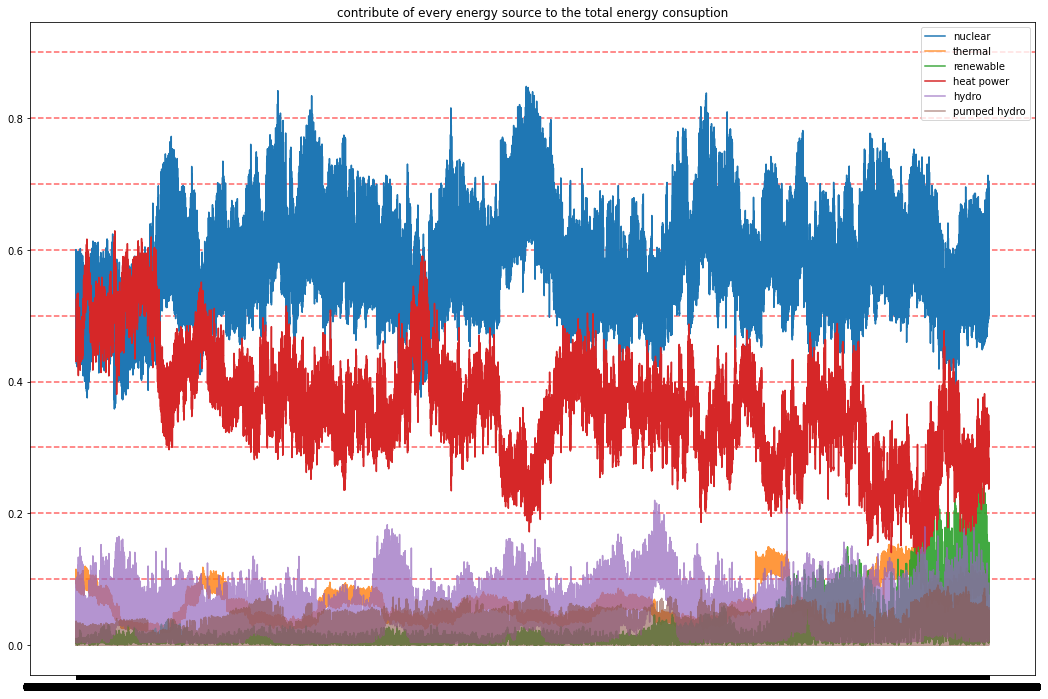

In [20]:
fig, ax = plt.subplots(1,1, figsize = (18,12)) # would not recommend to run it - it is slow.
ax.axhline(0.1, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.2, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.3, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.4, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.5, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.6, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.7, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.8, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.9, color = 'red',linestyle = '--',alpha =0.6)

plt.plot(df.datetime,df['production_nuclear_%'], label = 'nuclear')
plt.plot(df.datetime,df['production_thermal_%'], label = 'thermal',alpha =0.8)
plt.plot(df.datetime,df['production_renewable_%'], label = 'renewable',alpha =0.9)
plt.plot(df.datetime,df['production_heat_power_%'], label = 'heat power')
plt.plot(df.datetime,df['production_hydro_%'], label = 'hydro',alpha =0.7)
plt.plot(df.datetime,df['production_pumped_hydro_%'], label = 'pumped hydro',alpha =0.6)
plt.title('contribute of every energy source to the total energy consuption')
plt.legend()
plt.show()

In [ ]:
"""
What conclusion can be made out of this? 
First of all, we really see that the % of renewable
energy has heavily increased since 2014 - its almost 20% now - it may say that Ukraine started 
to look for alternative enegry sources as the whole world does. At the same time, the thermal
energy contribution is also gives us a 10% of energy in total, comparing to approximately
5% all years back - good sign as well. 
Secondly, we can see that the heat power production fell grealty since 2014 - from 50% to 30%
of total. That may be caused by the war actions on the East which cause the big loss of 
coal quarries in those regions - so we had to look for alternative energy sources and develop
those much more, especially considering that total energy consumption has increased.
The overall consumption of hydro and pumped hydro power did not change signicifantly since 2014
"""

In [21]:
df['total_prod'] = (df.production_nuclear+df.production_thermal+df.production_renewable+
    df.production_heat_power+df.production_hydro+df.production_pumped_hydro)
df['rate'] = df.consumption_total/df['total_prod']

df.datetime = pd.to_datetime(df.datetime)
df.set_index(df.datetime,inplace=True)

df_new = df.groupby([df.index.year,df.index.month]).mean()

rate = df_new.rate[:-3]
ranges = pd.date_range(start='2014-01-01', end='2020-10-03',freq='M')

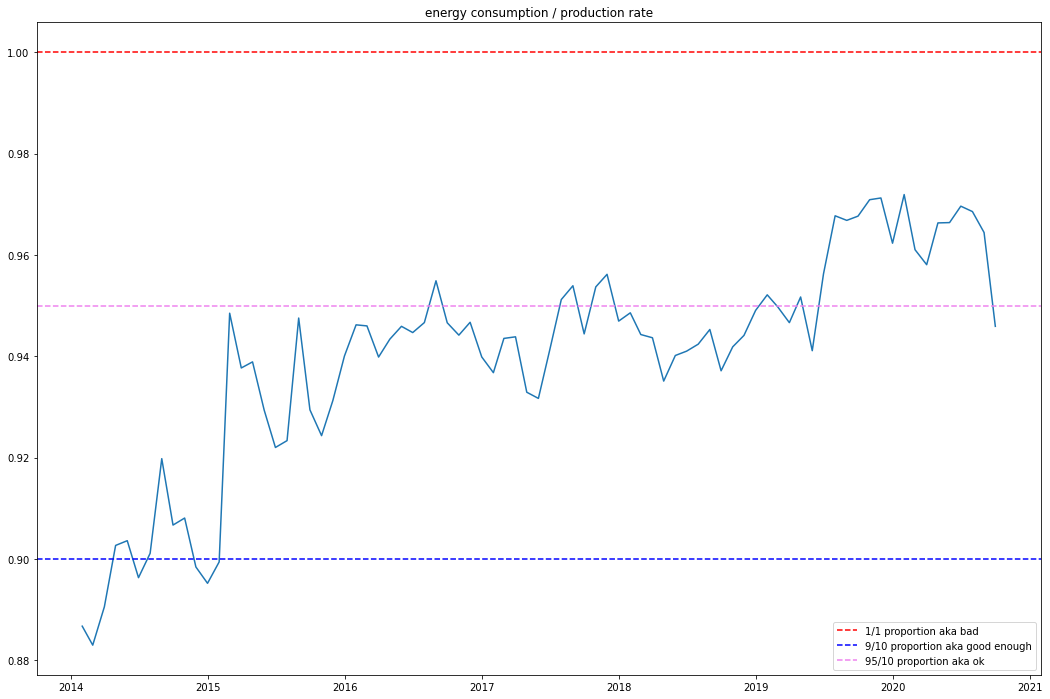

In [88]:
fig, ax = plt.subplots(1,1, figsize = (18,12))
plt.plot(ranges,rate)
plt.axhline(1, color = 'red',linestyle = '--',alpha =1, label = '1/1 proportion aka bad')
plt.axhline(0.9, color = 'blue',linestyle = '--',alpha =1, label = '9/10 proportion aka good enough')
plt.axhline(0.95, color = 'violet',linestyle = '--',alpha =1, label = '95/10 proportion aka ok')
plt.title('energy consumption / production rate')
plt.legend()

In [ ]:
"""
This chart also gives us alot of information to think about. It is well seen, that from the
year 2014 we have definitely lost some energy production power - the reasons was described
above - and we had to use the storages for the inner needs. Still, the overall picture
is good enough - we are able to product more than we need, having about 5% of resourses being
stored (if that is possible - otherwise it may say about inefficient use of natural resourses)
By the way, the last couple of years we have either used more energy that before, either 
producted less.
"""